In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
import validators
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer, util
import pickle
import nltk
import nltk
from nltk import word_tokenize

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
from nltk import word_tokenize
from nltk.wsd import lesk
from collections import defaultdict
from nltk.corpus import wordnet as wn
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from summa import keywords
import imblearn
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
 data_jobs = pd.read_pickle("C:\\Users\\shahania\\Documents\\Phd\\DSAA\\data_jobs_titles_df.pickle") 

In [3]:
Ground_Truth= [["Humanities",
    
    "Interdisciplinary studies (focus Humanities)",
"Area of study in the humanities",
"Protestant theology, religious studies",
"Diaconal Studies",
"Protestant religious education, ecclesiastical Educational Work",
"Protestant theology, religious education",
"Catholic theology, religious studies",
"Caritas Science",
"Catholic religious education, ecclesiastical Educational Work",
"Catholic theology, religious education",
"Philosophy",
"Ethics",
"Philosophy",
"Religious studies",
"History",
"Ancient history",
"Archaeology",
"History",
"Medieval and modern history",
"Prehistory and early history",
"Economic/social history",
"History of science/History of Technology",
"Information and Library Sciences",
"Archive and documentation science",
"Information and Library Sciences (not for colleges of administration)",
"General and comparative literature and linguistics",
"General literature",
"General Linguistics/Indo-European Studies",
"Applied Linguistics",
"Vocational Foreign Language Education",
"Computational Linguistics",
"Classical Philology",
"Modern Greek",
"Byzantine studies",
"Greek philology",
"Classical Philology",
"Latin",
"Modern Greek",
"German Studies (German, Germanic languages without English)",
"Danish",
"German as a foreign language or second language",
"German studies/German",
"Low German",
"Dutch",
"Nordic Studies/Scandinavian Studies (Nordic philology, individual languages)",
"English studies, American studies",
"American Studies/American Studies",
"English studies/English",
"Romance Studies",
"French",
"Italian",
"Portuguese",
"Romance Studies (Rom. Philology, Individual languages)",
"Spanish",
"Slavic studies, Baltic studies, Finno-Ugrian studies",
"Baltic studies",
"Finno-Ugrian studies",
"Polish",
"Russian philology",
"Slavic studies (Slavic philology)",
"Sorabian studies",
"South Slavic (Bulgarian, Serbo-Croatian, Slovenian)",
"Czech",
"Western Slavic",
"Other linguistics and Cultural Studies",
"Egyptology",
"African studies",
"Arabic/Arabic Studies",
"Non-European Languages and Cultures in Oceania and America",
"Jewish/Hebrew Studies",
"Indology",
"Iranian Studies",
"Islamic Studies",
"Japanese Studies",
"Caucasian Studies",
"Oriental Studies/Ancient Oriental Studies",
"Sinology/Korean Studies",
"Turkology",
"Asian Languages and Cultures/Asian Studies",
"Cultural studies in the narrower sense",
"European Ethnology and Cultural Studies",
"Ethnology",
"Islamic Studies/Islamic Theology",
"Media studies"
],
# ['Sports', 'sports science',
# 'Sports education/sports psychology',
# 'Sports science'],
["Law, economics and Social Sciences",
"Interdisciplinary studies (focus on law, economics and Social Sciences)",
"Social studies",
"Orientation studies",
"Social Sciences (New STF)",
"Regional Studies",
"Latin American Studies",
"Eastern and Southeastern European Studies",
"Other regional studies",
"Political science",
"Social sciences/sociology",
"Social studies",
"Social work",
"Social pedagogy",
"Law",
"Commercial law",
"administrative sciences",
"Labor and career counseling",
"Labor administration",
"Archives",
"Foreign affairs",
"Banking",
"Library services",
"Federal Armed Forces Administration",
"Financial administration",
"Internal administration",
"Correctional services",
"police/constitutional protection",
"Administration of justice",
"social security",
"Transportation",
"Administrative science",
"Customs and tax administration",
"Economics",
"Industrial science/economics",
"Business administration",
"European economics",
"Media economics/media management",
"International Business Administration/Management",
"Sports Management/Sports Economics",
"Tourism economics",
"Transportation economics",
"Economics",
"Business education",
"Economics and Business Administration",
"Industrial engineering with economic Focus",
"Facility management",
"Industrial engineering with economics main emphasis",
"Psychology",
"Educational science",
"Education of foreigners",
"Vocational and business education",
"Adult education and out-of-school youth education",
"Educational science (pedagogy)",
"Early childhood education",
"Elementary/primary school pedagogy",
"Physical education (incl. school gardening)",
"School pedagogy",
"Special education",
"Communication science/public relations"],
["Mathematics, natural sciences general",
"Interdisciplinary studies (focus on Natural Sciences)",
"Learning area science/Science Education",
"STEM Orientation Studies (New STF)",
"Statistics",
"Mathematics",
"Mathematics",
"Technomathematics",
"Physics, astronomy",
"Astrophysics and astronomy",
"physics",
"Chemistry",
"Biochemistry",
"Chemistry",
"Food chemistry",
"Pharmacy",
"Pharmacy",
"Biology",
"Anthropology (Human Biology)",
"Biology",
"Biomedicine",
"Biotechnology",
"Earth Sciences (excluding Geography)",
"Geology/Paleontology",
"Geophysics",
"Geoecology",
"Geosciences in general",
"Meteorology",
"Mineralogy",
"Oceanography",
"geography",
"Geography/Earth science",
"Landscape ecology/biogeography",
"Economic/social geography"],
["Human medicine/health sciences",
"Health education",
"Health sciences/management",
"Non-physician health professions/therapies",
"Nursing science/ management",
"Human medicine (excluding dentistry)",
"Medicine (general medicine)",
"Dentistry",
"Dentistry"],#[
# "Agricultural, forestry and nutrition sciences, veterinary medicine",
# "Veterinary medicine",
# "Veterinary medicine",
# "Land management, environmental design",
# "Land management/landscape design",
# "Land improvement",
# "Nature conservation",
# "Agricultural sciences, food and Beverage Technology",
# "Agricultural biology",
# "Agricultural economics",
# "Agricultural science/agriculture",
# "Brewing/Beverage Technology",
# "Horticulture",
# "Food technology",
# "Dairy and dairy farming",
# "Plant production",
# "Animal production",
# "Viticulture and winery",
# "Forestry, timber industry",
# "Forestry, forestry management",
# "Timber industry",
# "Food and Household sciences",
# "Nutrition science",
# "Household and nutrition science",
# "Home economics"],
 ["Engineering",
"Applied systems science",
"Interdisciplinary studies (focus on engineering sciences)",
"Learning area engineering",
"Mechatronics",
"Media technology",
"Regenerative energies",
"Works (technical)/technology",
"Mining, metallurgy",
"Archaeometry (engineering archaeology)",
"Mining/Mining Technology",
"Metallurgy and foundry engineering",
"Mine surveying",
"Mechanical engineering/process engineering",
"Waste management",
"Ophthalmic optics",
"Chemical engineering/Chemical Process Engineering",
"Printing and reproduction technology",
"Energy process engineering",
"Precision engineering",
"Manufacturing/production engineering",
"Health technology",
"Glass technology/ceramics",
"Wood/fiber technology",
"Plastics technology",
"Metal technology",
"Physical engineering/mechanical Process Engineering",
"Technical cybernetics",
"Textile and clothing technology/trades",
"Transportation/conveyor technology",
"Environmental engineering (incl. recycling)",
"Process engineering",
"Supply engineering",
"Electrical engineering and information technology",
"Electrical power engineering",
"Electrical engineering/electronics",
"Microelectronics",
"Microsystems technology",
"Communication and information technology",
"Optoelectronics",
"Traffic engineering, nautical engineering",
"Automotive engineering",
"Aerospace technology",
"Nautical/maritime",
"Shipbuilding/Ship Technology",
"Traffic engineering",
"Architecture, interior design",
"Architecture",
"Interior design",
"Space planning",
"Regional planning",
"Environmental protection",
"Civil engineering",
"Civil engineering/engineering",
"Timber construction",
"Steel construction",
"Hydraulic engineering",
"Water management",
"Surveying",
"Cartography",
"Surveying (geodesy)",
"Industrial engineering with engineering Focus",
"Industrial engineering with engineering Focus",
"Computer science",
"Bioinformatics",
"Computer and communication technologies",
"computer science",
"Engineering Computer Science/Technical Computer Science",
"Media informatics",
"Medical informatics",
"Business informatics",
"Materials Science and Materials Engineering",
"Materials science",
"Materials engineering"],
["Art",
"Art studies",
"Interdisciplinary Studies (focus art, art science)",
"Art education",
"Art history",
"Art science",
"Restoration studies",
"Fine arts",
"Fine arts/graphics",
"Sculpture/Plastics",
"Painting",
"New media",
"Design",
"Applied arts",
"Gem and jewelry design",
"Graphic design/communication design",
"Industrial design/product design",
"Textile design",
"Work education",
"Performing arts",
"Film and television",
"Theater Studies",
"Performing arts/stagecraft/directing",
"Film and television",
"Drama",
"Dance education",
"Theatre studies",
"Music",
"Musicology",
"Conducting",
"Singing",
"Instrumental music",
"Jazz and popular music",
"Church music",
"Composition",
"Music education",
"Musicology/history",
"Orchestral music",
"Rhythmics",
"Sound engineer"]]

In [4]:
mapping = {0 : 'Humanities' ,
#            1 : 'Sports' ,
           1 : 'Law, economic and social sciences',
           2 : 'Mathematics, natural sciences',
           3 : 'Human Medicine/Health Sciences',


           
#            5 : 'Agricultural, forestry and nutritional sciences, veterinary medicine',
           4 : 'Engineering',
           5 : 'Art, art science'}

In [5]:
Ground_Truth_New =[]
for elem in Ground_Truth:
    Ground_Truth_New.append(list(dict.fromkeys(elem)))
    
Clean_Ground_Truth = []
for i in range(len(Ground_Truth_New)):
    Clean_Ground_Truth.append([])
    for elem in Ground_Truth_New[i]:
#         temp = elem.lower()
        temp= elem.strip()
        Clean_Ground_Truth[i].append(temp)
        
        
Ground_Truth_Sentence = []
for elem in Clean_Ground_Truth:
    Ground_Truth_Sentence.append(' '.join(elem))

In [262]:
cleaned_job_titles= []
for i in range(len(data_jobs['Job_title_english'])):
    print(i)
    temp = re.sub('Professur','Professorship',data_jobs['Job_title_english'][i])
    temp = re.sub('für','for',temp)
    temp = re.sub('- full-time or part-time' , '', temp)

    temp = re.sub('part-time' , '', temp)
    temp = re.sub('full-time', '', temp)
    temp = re.sub('Full-time', '', temp)
    temp = re.sub('W2-', '', temp)
    temp = re.sub('W2', '', temp)
    temp = re.sub('W3', '', temp)
    temp = re.sub(':', ' ', temp)
#     temp = re.sub('\(', "", temp)
    temp = re.sub("[\(\[].*?[\)\]]", "", temp)
#     temp = re.sub ('(\(| )[mfdMFD]/[mfdMFD](/[mfdMFD])?(\)| )', '',temp)

    temp = re.sub('\(', "", temp)
    temp = re.sub(r"(m/f/w|f/m|w/m)/d", "", temp)
    temp = temp.replace("w|m|d", "")
    temp = temp.replace("m/f/d", "")
    temp = re.sub('\u200b\u200b','', temp)
    temp = " ".join(re.split("\s+", temp, flags=re.UNICODE))
#     temp = temp.title()

    temp = temp.strip()
#     temp = re.split(r"\bprof\w*",temp)[1].strip()


    cleaned_job_titles.append(temp) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [263]:
cleaned_job_titles_wo_sw = [' '.join([word for word in text.split() if word.lower() not in stop_words]) for text in cleaned_job_titles]

In [8]:
pattern = re.compile(r'\bprofessor\b', flags=re.IGNORECASE)
cleaned_job_titles_wo_sw = [pattern.sub('', text) for text in cleaned_job_titles_wo_sw]
pattern = re.compile(r'\bprofessorship\b', flags=re.IGNORECASE)
cleaned_job_titles_wo_sw = [pattern.sub('', text) for text in cleaned_job_titles_wo_sw]
cleaned_job_titles_wo_sw = [text.strip() for text in cleaned_job_titles_wo_sw if text]

In [9]:
data_jobs['First level (Fächersystematik)']= data_jobs['First level (Fächersystematik)'].replace('Legal, economic and social sciences', 'Law, economic and social sciences')

In [10]:
data_jobs['First level (Fächersystematik)']= data_jobs['First level (Fächersystematik)'].replace('Agricultural, forestry and nutritional sciences, veterinary medicine', 'Human Medicine/Health Sciences')

In [11]:
data_jobs['First level (Fächersystematik)']= data_jobs['First level (Fächersystematik)'].replace('Sports', 'Law, economic and social sciences')

In [12]:
Actual_Thema = []
for elem in data_jobs['First level (Fächersystematik)']:
    temp = elem.lower()
    temp = temp.strip()
    Actual_Thema.append(temp)

Baselines: **TF-IDF and BERT**

In [264]:
corpus = Ground_Truth_Sentence
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
Ground_Truth_TF_IDF_Embeddings = (np.array(X.todense()))
tf_idf_features =[np.array(vectorizer.transform([elem]).todense())[0] for elem in cleaned_job_titles]

In [305]:
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')


In [362]:
wn.synsets('food')[0].definition()

'any substance that can be metabolized by an animal to give energy and build tissue'

In [319]:
X, y = cleaned_job_titles, data_jobs['First level (Fächersystematik)']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, 
                                                               y, 
                                                               data_jobs.index, test_size=0.25, 
                                                               random_state=1,stratify=y)

In [307]:
from sklearn.pipeline import make_pipeline

In [320]:
pipe = make_pipeline(vectorizer,model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=1000))])

In [313]:
import scipy
import numpy as np
def monkeypath_itemfreq(sampler_indices):
    return zip(*np.unique(sampler_indices, return_counts=True))

scipy.stats.itemfreq=monkeypath_itemfreq

In [321]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(cleaned_job_titles[93], pipe.predict_proba)
te.show_prediction(target_names=[t[0] for t in list(le_name_mapping.items())])

C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [277]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
bert_features_1 = [model.encode(elem) for elem in cleaned_job_titles ]

In [278]:
model = SentenceTransformer('all-mpnet-base-v2')
bert_features_2 = model.encode(cleaned_job_titles)

In [1582]:
token_index = {}
#Create a counter for counting the number of key-value pairs in the token_length
counter = 0

# Select the elements of the samples which are the two sentences
for sample in cleaned_job_titles_wo_sw:                                      
    for considered_word in sample.split():
        if considered_word not in token_index:
            token_index.update({considered_word : counter + 1}) 
            counter = counter + 1      
            
# # Set max_length to 6
# max_length = 6
# Create a tensor of dimension 3 named results whose every elements are initialized to 0
results  = np.zeros(shape = (len(cleaned_job_titles_wo_sw),
                            max(token_index.values()) + 1))  


# Now create a one-hot vector corresponding to the word
# iterate over enumerate(samples) enumerate object
for i, sample in enumerate(cleaned_job_titles_wo_sw): 
  
# Convert enumerate object to list and iterate over resultant list 
  for j, considered_word in list(enumerate(sample.split())):
    
    # set the value of index variable equal to the value of considered_word in token_index
    index = token_index.get(considered_word)
    
    # In the previous zero tensor: results, set the value of elements with their positional index as [i, j, index] = 1.
    results[i, index] = 1.  

Class=4, n=92 (61.333%)
Class=1, n=33 (22.000%)
Class=2, n=17 (11.333%)
Class=0, n=6 (4.000%)
Class=3, n=2 (1.333%)


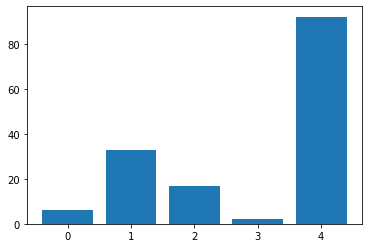

In [1439]:
# split into input and output elements
X, y = TfidfVectorizer, data_jobs['First level (Fächersystematik)']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_jobs['First level (Fächersystematik)'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [42]:
from sklearn.model_selection import train_test_split

In [300]:
from sklearn.model_selection import train_test_split
X, y = tf_idf_features, data_jobs['First level (Fächersystematik)']
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, 
                                                               y, 
                                                               data_jobs.index, test_size=0.25, 
                                                               random_state=1,stratify=y)
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

# model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

In [301]:
Correct_Classes = []
Incorrect_Classes = []
for i in range(len(y_pred)):
    if y_pred[i]!=y_test[i]:
        Incorrect_Classes.append((y_test[i],y_pred[i],i))
    else:
        Correct_Classes.append((y_test[i],y_pred[i],i))

In [302]:
Incorrect_Classes

[(1, 4, 2),
 (0, 4, 4),
 (2, 4, 6),
 (2, 4, 12),
 (1, 4, 21),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31)]

In [273]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)

0.425

In [282]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.62      0.71         8
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         1
           4       0.79      1.00      0.88        23

    accuracy                           0.82        38
   macro avg       0.53      0.47      0.49        38
weighted avg       0.76      0.82      0.78        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
le_name_mapping

{'Art, art science': 0,
 'Engineering': 1,
 'Human Medicine/Health Sciences': 2,
 'Humanities': 3,
 'Law, economic and social sciences': 4}

In [1596]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred)) #one hot encoding

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.38      0.50         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.68      1.00      0.81        23

    accuracy                           0.68        38
   macro avg       0.29      0.28      0.26        38
weighted avg       0.57      0.68      0.59        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1597]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.2761904761904761
Matthew's corrcoef 0.36620624830892234
Log loss 1.72148201912875


In [274]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred)) #TF-IDF

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.62      0.77         8
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         1
           4       0.74      1.00      0.85        23

    accuracy                           0.79        38
   macro avg       0.55      0.42      0.46        38
weighted avg       0.76      0.79      0.75        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.554904831625183
Matthew's corrcoef 0.617407978452757
Log loss 2.30049832088482


In [1631]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred)) #bert -1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.75      0.80         8
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         1
           4       0.79      1.00      0.88        23

    accuracy                           0.82        38
   macro avg       0.53      0.45      0.47        38
weighted avg       0.77      0.82      0.77        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss

In [1632]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.6269284712482468
Matthew's corrcoef 0.6615872579565533
Log loss 0.4984275724388638


In [1634]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred)) #bert -2

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.75      0.80         8
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         1
           4       0.82      1.00      0.90        23

    accuracy                           0.84        38
   macro avg       0.54      0.50      0.51        38
weighted avg       0.78      0.84      0.80        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1635]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.6885245901639344
Matthew's corrcoef 0.7130060987353805
Log loss 0.5278001115897776


*Domain Embeddings*

In [13]:
# Loading the Wordnet domains.
domain2synsets = defaultdict(list)
synset2domains = defaultdict(list)
for i in open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\DataSet\\wn-domains-3.2\\wn-domains-3.2-20070223', 'r'):
    ssid, doms = i.strip().split('\t')
    doms = doms.split()
    synset2domains[ssid] = doms
    for d in doms:
        domain2synsets[d].append(ssid)

In [14]:
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\DataSet\\WordNet-2.0\\dict\\data.noun', 'r', encoding='utf-8') as file:
    data_nouns = file.read()
    
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\DataSet\\WordNet-2.0\\dict\\data.adj', 'r', encoding='utf-8') as file:
    data_adj = file.read()
    
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\DataSet\\WordNet-2.0\\dict\\data.adv', 'r', encoding='utf-8') as file:
    data_adv = file.read()
    
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\DataSet\\WordNet-2.0\\dict\\data.verb', 'r', encoding='utf-8') as file:
    data_verb = file.read()

In [15]:
data_nouns = data_nouns.split('\n')
data_nouns = data_nouns[29:]
synsets_noun = []
for elem in data_nouns:
    offset = elem[0:8]
    
    word = elem [17:].split(' ')[0]
    pos =  elem [12]
    index = elem[14:16]
    string = word +'.'+pos +'.'+index
    if ';' in elem.split('|')[1]:
        definition = elem.split('|')[1].split(';')[0].strip()
    else:
        definition = elem.split('|')[1].strip()
    synsets_noun.append((offset,string, definition))

IndexError: string index out of range

In [17]:
data_adj = data_adj.split('\n')
data_adj = data_adj[29:]

synsets_adj = []
for elem in data_adj:
    offset = elem[0:8]
    
    word = elem [17:].split(' ')[0]
    pos =  elem [12]
    index = elem[14:16]
    string = word +'.'+pos +'.'+index
    if ';' in elem.split('|')[1]:
        definition = elem.split('|')[1].split(';')[0].strip()
    else:
        definition = elem.split('|')[1].strip()
    synsets_adj.append((offset,string,definition))

IndexError: string index out of range

In [18]:
data_verb = data_verb.split('\n')
data_verb = data_verb[29:]

synsets_verb = []
for elem in data_verb:
    offset = elem[0:8]
    
    word = elem [17:].split(' ')[0]
    pos =  elem [12]
    index = elem[14:16]
    string = word +'.'+pos +'.'+index
    if ';' in elem.split('|')[1]:
        definition = elem.split('|')[1].split(';')[0].strip()
    else:
        definition = elem.split('|')[1].strip()
    synsets_verb.append((offset,string,definition))

IndexError: string index out of range

In [16]:
data_adv = data_adv.split('\n')
data_adv = data_adv[29:]

synsets_adv = []
for elem in data_adv:
    offset = elem[0:8]
    
    word = elem [17:].split(' ')[0]
    pos =  elem [12]
    index = elem[14:16]
    string = word +'.'+pos +'.'+index
    if ';' in elem.split('|')[1]:
        definition = elem.split('|')[1].split(';')[0].strip()
    else:
        definition = elem.split('|')[1].strip()
    synsets_adv.append((offset,string,definition))

IndexError: string index out of range

In [19]:
synsets_complete = synsets_noun + synsets_adj + synsets_adv + synsets_verb

In [20]:
cleaned_job_titles[93]

'Professorship for Church and Mission History'

In [21]:
wn.synsets('History')[2]

Synset('history.n.03')

In [22]:
synsets_titles[93]

NameError: name 'synsets_titles' is not defined

In [25]:
Bigrams_cleaned_job_titles_wo_sw = []
for elem in cleaned_job_titles:
    tokens = nltk.word_tokenize(elem)
    bigrams = list(nltk.bigrams(tokens))
    temp_bigrams = []
    temp_bigrams.extend(tokens)  # Use extend instead of append to add individual tokens
    skip_next = False
    for i, temp in enumerate(bigrams):
        if skip_next:
            skip_next = False
            continue
        check_bigram = '_'.join(temp)
        if wn.synsets(check_bigram):
            temp_bigrams[i:i+2] = [check_bigram]
            skip_next = True
            # Replace the bigram with its joined form in the temp_bigrams list
    
    Bigrams_cleaned_job_titles_wo_sw.append(temp_bigrams)


In [26]:
Bigrams_cleaned_job_titles_wo_sw

[['Professorship', 'for', 'Digital', 'and', 'Sustainable', 'Marketing'],
 ['Professorship', 'for', 'IT', 'Business', 'and', 'Digitalization'],
 ['Professorship', 'Management', 'in', 'civil', 'protection'],
 ['professorship', 'for', 'basic', 'medicine'],
 ['professorship', 'for', 'nursing', 'and', 'health', 'management'],
 ['Professor',
  'in',
  'psychology',
  ',',
  'especially',
  'clinical',
  'and',
  'social_psychology'],
 ['Professor', 'in', 'company', 'health', 'management'],
 ['a',
  'professorship',
  'for',
  'violin',
  'and',
  'ensemble',
  'playing',
  'as_well',
  'as',
  'a',
  'professorship',
  'for',
  'viola',
  'and',
  'ensemble',
  'playing'],
 ['Professorship',
  'for',
  'transcultural',
  'music',
  'education/music',
  'mediation'],
 ['Professorship', 'for', 'engineering_sciences'],
 ['Professorship', 'for', 'technical', 'sustainability', 'management'],
 ['Professorship',
  'for',
  'business',
  'informatics',
  ',',
  'esp',
  '.',
  'operational',
  'appl

In [23]:
# Bigrams_cleaned_job_titles_wo_sw = []
# for elem in cleaned_job_titles:
#     tokens = nltk.word_tokenize(elem)
#     bigrams = list(nltk.bigrams(tokens))
#     temp_bigrams = []
#     temp_bigrams.extend(tokens)  # Use extend instead of append to add individual tokens
#     for temp in bigrams:
#         check_bigram = '_'.join(temp)
#         if wn.synsets(check_bigram):
#             temp_bigrams = [check_bigram if word1 == temp[0] and word2 == temp[1] else word1 for word1, word2 in nltk.bigrams(temp_bigrams)]
#             # Replace the bigram with its joined form in the temp_bigrams list
    
#     Bigrams_cleaned_job_titles_wo_sw.append(temp_bigrams)

In [1038]:
Bigrams_cleaned_job_titles_wo_sw[134]

['PROFESSOR', 'Ergotherapie', 'Occupational_Therapy']

In [27]:
Bigrams_cleaned_job_titles_wo_sw[134].append('Occupational_Therapy')

In [167]:
cleaned_job_titles[133] = 'PROFESSORS DEPARTMENT OF MEDICAL PEDAGOGY'

In [168]:
cleaned_job_titles[3] = 'professorship for medicine'

In [169]:
cleaned_job_titles[77] = 'Professorship of Education in healthcare'

In [1318]:
domains_title[3]

['pedagogy', 'computer_science', 'medicine']

In [174]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load tagger
tagger = SequenceTagger.load("flair/pos-english")




Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

C:\Users\shahania\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shahania\.flair\models\pos-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


2023-05-08 12:40:15,986 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
Sentence[4]: "I love Berlin." → ["I"/PRP, "love"/VBP, "Berlin"/NNP, "."/.]
The following NER tags are found:


In [434]:
# from flair.embeddings import TransformerWordEmbeddings
# from flair.data import Sentence
# # use first and last subtoken for each word
# embeddings = TransformerWordEmbeddings('bert-base-uncased')


In [173]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence

# context_embedding = TransformerDocumentEmbeddings('bert-base-uncased')


In [905]:
# from flair.embeddings import BertEmbeddings
# from flair.embeddings import ELMoEmbeddings

In [170]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, DocumentPoolEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
#                                       TransformerWordEmbeddings('bert-base-uncased'),
                                        WordEmbeddings('glove'),
                                        FlairEmbeddings('news-forward'),
                                        FlairEmbeddings('news-backward'),
                                       ])

In [171]:
document_embeddings = DocumentPoolEmbeddings([
#                                               TransformerDocumentEmbeddings('bert-base-uncased'),
                                        WordEmbeddings('glove'),
                                        FlairEmbeddings('news-forward'),
                                        FlairEmbeddings('news-backward'),
                                             ])

In [1325]:
model = SentenceTransformer('all-mpnet-base-v2')

In [811]:
# synsets_titles= []
# for i in range(len(cleaned_job_titles)):
#     print(i,flush=True)
#     synsets_titles.append([])
# #     sentence = Sentence((' ').join(Bigrams_cleaned_job_titles_wo_sw[i]))
#     sentence = Sentence(cleaned_job_titles[i])
# #     sentence = Sentence(' '.join(cleaned_job_titles[i]))
#     stacked_embeddings.embed(sentence)
#     tokens = nltk.word_tokenize(cleaned_job_titles[i]) #Bigrams_cleaned_job_titles_wo_sw[i]
#     sentence_embedding = []
#     for token in sentence:
#         sentence_embedding.append(token.embedding)
# #     sentence_embedding = model.encode(tokens)
#     for elem in tokens:
#         synsets = wn.synsets(elem)
#         query_word = elem
#         quer_embedding = sentence_embedding[tokens.index(query_word)]
#         if len(synsets)>1:
#             definitions = []
#             for syn in synsets:
#                 definitions.append(syn.definition())
#             defintion_embeddings=[]    
#             for defi in definitions:
#                 defsentence = Sentence(defi)
#                 stacked_embeddings.embed(defsentence)
#                 temp = []
#                 for token in defsentence:
#                     temp.append(token.embedding)
#                 embeddings_tensor = torch.stack(temp)
#                 defintion_embeddings.append(torch.mean(embeddings_tensor, dim=0))
# #             defintion_embeddings = model.encode(definitions)
#             temp_sim=[]
#             for def_emb in defintion_embeddings:
#                 temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
#             index = np.argmax(temp_sim)
#             synsets_titles[i].append((synsets[index],elem))
#         elif len(synsets) == 1:
#             synsets_titles[i].append((synsets[0],elem))

0


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [28]:
synsets_titles_lesk = []
for i in range(len(Bigrams_cleaned_job_titles_wo_sw)):
    synsets_titles_lesk.append([])
    for elem in (Bigrams_cleaned_job_titles_wo_sw[i]):
        if lesk(Bigrams_cleaned_job_titles_wo_sw[i],elem):
#              if lesk(Bigrams_cleaned_job_titles_wo_sw[i],elem).pos() in ['n','a','v']:
                synsets_titles_lesk[i].append((lesk(Bigrams_cleaned_job_titles_wo_sw[i],elem),elem))

In [113]:
from transformers import pipeline

classifier = pipeline(model="facebook/bart-large-mnli")

In [114]:
synsets_titles_lesk=[]
for i in range(len(cleaned_job_titles)):
    print(i, flush= True)
# Define the sentence
    sentence = cleaned_job_titles[i]

    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)

    # Create a list to store the correct synset for each word
    correct_synsets = []

    # Loop through each word in the sentence
    for token in tokens:
        # Get all the synsets for the word
        synsets = wn.synsets(token)
        if len(synsets)>1:

            # Get the definitions for each synset
            definitions = [syn.definition() for syn in synsets]

            # Define the possible labels
            possible_labels = []
            for definition in definitions:
                # Use TextRank to extract the most important phrases from the definition
                keywords_list = keywords.keywords(definition).split('\n')
                possible_labels.extend(keywords_list)

            # Define the context
            context = sentence

            # Classify the labels
            result = classifier(context, possible_labels, multi_label=True)

            # Get the predicted label with the highest score
            predicted_label = result['labels'][0]

            # Get the index of the predicted label
            idx = possible_labels.index(predicted_label)

            # Get the correct synset
            correct_synset = synsets[idx]

            # Add the correct synset to the list
            correct_synsets.append((correct_synset,token))
        elif len(synsets) ==1:
            correct_synsets.append((synsets[0],token))
            
    synsets_titles_lesk.append(correct_synsets)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [174]:
synsets_titles= []
for i in range(len(cleaned_job_titles)):
    print(i,flush=True)
    synsets_titles.append([])
#     sentence = Sentence((' ').join(Bigrams_cleaned_job_titles_wo_sw[i]))
    sentence = Sentence(cleaned_job_titles[i])

    stacked_embeddings.embed(sentence)
    tokens =  nltk.word_tokenize(cleaned_job_titles[i])
#    tokens =   Bigrams_cleaned_job_titles_wo_sw[i] 
    sentence_embedding = []
    for token in sentence:
        sentence_embedding.append(token.embedding)
#     sentence_embedding = model.encode(tokens)
    for elem in tokens:
        synsets = wn.synsets(elem)
        query_word = elem
        quer_embedding = sentence_embedding[tokens.index(query_word)]
        if len(synsets)>1:
            definitions = []
            for syn in synsets:
                definitions.append(syn.definition())
            defintion_embeddings=[]    
            for defi in definitions:
                defsentence = Sentence(defi)
                document_embeddings.embed(defsentence)
#                 temp = []
#                 for token in defsentence:
# #                     temp.append(token.embedding)
#                 embeddings_tensor = torch.stack(temp)
                defintion_embeddings.append(defsentence.embedding)
#             defintion_embeddings = model.encode(definitions)
            temp_sim=[]
            for def_emb in defintion_embeddings:
                temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
            index = np.argmax(temp_sim)
            synsets_titles[i].append((synsets[index],elem))
        elif len(synsets) == 1:
            synsets_titles[i].append((synsets[0],elem))

0


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1480]:
Ground_Truth_Sentence

['Humanities Interdisciplinary studies (focus Humanities) Area of study in the humanities Protestant theology, religious studies Diaconal Studies Protestant religious education, ecclesiastical Educational Work Protestant theology, religious education Catholic theology, religious studies Caritas Science Catholic religious education, ecclesiastical Educational Work Catholic theology, religious education Philosophy Ethics Religious studies History Ancient history Archaeology Medieval and modern history Prehistory and early history Economic/social history History of science/History of Technology Information and Library Sciences Archive and documentation science Information and Library Sciences (not for colleges of administration) General and comparative literature and linguistics General literature General Linguistics/Indo-European Studies Applied Linguistics Vocational Foreign Language Education Computational Linguistics Classical Philology Modern Greek Byzantine studies Greek philology L

In [1482]:
Clean_Ground_Truth

[['Humanities',
  'Interdisciplinary studies (focus Humanities)',
  'Area of study in the humanities',
  'Protestant theology, religious studies',
  'Diaconal Studies',
  'Protestant religious education, ecclesiastical Educational Work',
  'Protestant theology, religious education',
  'Catholic theology, religious studies',
  'Caritas Science',
  'Catholic religious education, ecclesiastical Educational Work',
  'Catholic theology, religious education',
  'Philosophy',
  'Ethics',
  'Religious studies',
  'History',
  'Ancient history',
  'Archaeology',
  'Medieval and modern history',
  'Prehistory and early history',
  'Economic/social history',
  'History of science/History of Technology',
  'Information and Library Sciences',
  'Archive and documentation science',
  'Information and Library Sciences (not for colleges of administration)',
  'General and comparative literature and linguistics',
  'General literature',
  'General Linguistics/Indo-European Studies',
  'Applied Linguist

In [1483]:
synsets_gt= []
for i in range(len(Clean_Ground_Truth)):
    print(i,flush=True)
    synsets_gt.append([])
#     sentence = Sentence((' ').join(Bigrams_cleaned_job_titles_wo_sw[i]))
    sentence = Sentence(Ground_Truth_Sentence[i])

    stacked_embeddings.embed(sentence)
#     tokens =  nltk.word_tokenize(cleaned_job_titles[i])
    tokens =   Clean_Ground_Truth[i] 
    sentence_embedding = []
    for token in sentence:
        sentence_embedding.append(token.embedding)
#     sentence_embedding = model.encode(tokens)
    for elem in tokens:
        synsets = wn.synsets(elem)
        query_word = elem
        quer_embedding = sentence_embedding[tokens.index(query_word)]
        if len(synsets)>1:
            definitions = []
            for syn in synsets:
                definitions.append(syn.definition())
            defintion_embeddings=[]    
            for defi in definitions:
                defsentence = Sentence(defi)
                document_embeddings.embed(defsentence)
#                 temp = []
#                 for token in defsentence:
# #                     temp.append(token.embedding)
#                 embeddings_tensor = torch.stack(temp)
                defintion_embeddings.append(defsentence.embedding)
#             defintion_embeddings = model.encode(definitions)
            temp_sim=[]
            for def_emb in defintion_embeddings:
                temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
            index = np.argmax(temp_sim)
            synsets_gt[i].append((synsets[index],elem))
        elif len(synsets) == 1:
            synsets_gt[i].append((synsets[0],elem))

0


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


1
2
3
4
5


In [466]:
# definitions = []
# for elem in synsets_complete:
#     definitions.append(elem[2])
# defintion_embeddings=[]    
# for defi in definitions:
#     defsentence = Sentence(defi)
#     context_embedding.embed(defsentence)
#     defintion_embeddings.append(defsentence.embedding)

In [470]:
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\synset_all_definition_embeddings.pickle', 'wb') as handle:
    pickle.dump(defintion_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [510]:
with open('C:\\Users\\shahania\\Documents\\Phd\\DSAA\\synsets_titles_all_synset.pickle', 'wb') as handle:
    pickle.dump(synsets_titles, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [476]:
# synsets_titles= []
# for i in range(len(cleaned_job_titles)):
#     print(i, flush=True)
#     synsets_titles.append([])
#     sentence = Sentence(cleaned_job_titles[i])
#     embeddings.embed(sentence)
#     sentence_embedding = [token.embedding for token in sentence]
#     for j, elem in enumerate(sentence.tokens):
#         query_word = elem.text
#         quer_embedding = sentence_embedding[j]
#         temp_sim=[]
#         for def_emb in defintion_embeddings:
#             temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
#         index = np.argmax(temp_sim)
#         synsets_titles[i].append((synsets_complete[index], query_word))


0


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [475]:
# synsets_titles= []
# for i in range(len(cleaned_job_titles)):
#     print(i,flush=True)
#     synsets_titles.append([])
#     sentence = Sentence(cleaned_job_titles[i])
#     embeddings.embed(sentence)
#     tokens = nltk.word_tokenize(cleaned_job_titles[i])
#     sentence_embedding = []
#     for token in sentence:
#         sentence_embedding.append(token.embedding)

#     for elem in tokens:

#         query_word = elem
#         quer_embedding = sentence_embedding[tokens.index(query_word)]

#         temp_sim=[]
#         for def_emb in defintion_embeddings:
#             temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
#         index = np.argmax(temp_sim)
#         synsets_titles[i].append((synsets_complete[index],elem))


0


KeyboardInterrupt: 

In [1393]:
for i in range(len(synsets_titles)):
    if len(synsets_titles[i]) ==0:
        print(i)

In [1953]:
synsets_titles_lesk[134]

[(Synset('professor.n.01'), 'PROFESSOR')]

In [175]:
synsets_titles[134].append((wn.synset('occupational_therapy.n.01'),'Ergotherapy'))

In [722]:
# # Iterate over each sublist in the list
# for i, sublist in enumerate(synsets_titles):
#     # Iterate over each tuple in the sublist
#     for j, (syn, subject) in enumerate(sublist):
#         if subject == 'psychology':
#             # Replace the first element in the tuple with a new value
#             synsets_titles[i][j] = (wn.synset('management.n.02'), subject)

In [606]:
# synset_indexing= []
# for i in range(len(synsets_titles)):
#     synset_indexing.append([])
#     for elem in synsets_titles[i]:
#         synset_indexing[i].append(elem[0][0])
    

TypeError: 'Synset' object is not subscriptable

In [330]:
synset_indexing = []
for i in range(len(synsets_titles)):
    synset_indexing.append([])
    for elem in synsets_titles[i]:
        definition = elem[0].definition().split(';')[0].strip()
        
#         definition = wn.synset(elem).definition().split(';')[0].strip()
        match_found = False
        for temp in synsets_complete:
            if temp[2] == definition:
#                 word = elem.split('.')[0]
                index = temp[0]
                string = index + '-' + elem[0].name().split('.')[1]
                synset_indexing[i].append((string,elem))
                match_found = True
                break
        if not match_found:
            hypernym = elem[0].hypernyms()
            if len(hypernym)!=0:
                hypernym_def = hypernym[0].definition().split(';')[0].strip()
                for temp in synsets_complete:
                    if temp[2] == hypernym_def:
#                         word = elem.split('.')[0]
                        index = temp[0]
                        string = index + '-' + elem[0].name().split('.')[1]
                        synset_indexing[i].append((string,elem))
                        break
                

In [117]:
synset_indexing_lesk = []
for i in range(len(synsets_titles_lesk)):
    synset_indexing_lesk.append([])
    for elem in synsets_titles_lesk[i]:
        definition = elem[0].definition().split(';')[0].strip()
        
#         definition = wn.synset(elem).definition().split(';')[0].strip()
        match_found = False
        for temp in synsets_complete:
            if temp[2] == definition:
#                 word = elem.split('.')[0]
                index = temp[0]
                string = index + '-' + elem[0].name().split('.')[1]
                synset_indexing_lesk[i].append((string))
                match_found = True
                break
        if not match_found:
            hypernym = elem[0].hypernyms()
            if len(hypernym)!=0:
                hypernym_def = hypernym[0].definition().split(';')[0].strip()
                for temp in synsets_complete:
                    if temp[2] == hypernym_def:
#                         word = elem.split('.')[0]
                        index = temp[0]
                        string = index + '-' + elem[0].name().split('.')[1]
                        synset_indexing_lesk[i].append((string))
                        break
                

In [1487]:
synset_indexing_gt = []
for i in range(len(synsets_gt)):
    synset_indexing_gt.append([])
    for elem in synsets_gt[i]:
        definition = elem[0].definition().split(';')[0].strip()
        
#         definition = wn.synset(elem).definition().split(';')[0].strip()
        match_found = False
        for temp in synsets_complete:
            if temp[2] == definition:
#                 word = elem.split('.')[0]
                index = temp[0]
                string = index + '-' + elem[0].name().split('.')[1]
                synset_indexing_gt[i].append((string))
                match_found = True
                break
        if not match_found:
            hypernym = elem[0].hypernyms()
            if len(hypernym)!=0:
                hypernym_def = hypernym[0].definition().split(';')[0].strip()
                for temp in synsets_complete:
                    if temp[2] == hypernym_def:
#                         word = elem.split('.')[0]
                        index = temp[0]
                        string = index + '-' + elem[0].name().split('.')[1]
                        synset_indexing_gt[i].append((string))
                        break

In [1396]:
for i in range(len(synset_indexing)):
    if len(synset_indexing[i]) ==0:
        print(i)

In [334]:
Domain_Embedding = list(domain2synsets.keys())
Domain_Embedding = Domain_Embedding[1:]
model = SentenceTransformer('all-mpnet-base-v2')
Domain_Embeddings_Bert = model.encode(Domain_Embedding)

In [119]:
domains_title_lesk =[]
for i in range(len(synset_indexing_lesk)):
    print(i,flush=True)
    domains_title_lesk.append([])
    for elem in synset_indexing_lesk[i]:

        if synset2domains[elem][0]!='factotum':
            domains_title_lesk[i].append(synset2domains[elem][0])
        else:
            for tup in synsets_complete:
                if tup[0] == elem.split('-')[0]:
                    doc1 = model.encode(tup[2])
                    temp_sim = []
                    for j in range(len(Domain_Embeddings_Bert)):
                        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
                    index = np.argmax(temp_sim)
#                     value = max(temp_sim)
                    domains_title_lesk[i].append(Domain_Embedding[index])

0
1
2
3
4


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [332]:
synset_indexing[0]

[('00565801-n', (Synset('professorship.n.01'), 'Professorship')),
 ('00117555-a', (Synset('digital.a.03'), 'Digital')),
 ('02681029-a', (Synset('sustainable.a.01'), 'Sustainable')),
 ('02231793-v', (Synset('market.v.01'), 'Marketing'))]

In [335]:
domains_title =[]
for i in range(len(synset_indexing)):
    print(i,flush=True)
    domains_title.append([])
    for elem in synset_indexing[i]:

        if synset2domains[elem[0]][0]!='factotum':
            domains_title[i].append((synset2domains[elem[0]][0],elem[1][1]))
        else:
            for tup in synsets_complete:
                if tup[0] == elem[0].split('-')[0]:
                    doc1 = model.encode(tup[2])
                    temp_sim = []
                    for j in range(len(Domain_Embeddings_Bert)):
                        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
                    index = np.argmax(temp_sim)
#                     value = max(temp_sim)
                    domains_title[i].append((Domain_Embedding[index],elem[1][1]))

0
1
2


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [178]:
domains_title =[]
for i in range(len(synset_indexing)):
    print(i,flush=True)
    domains_title.append([])
    for elem in synset_indexing[i]:

        if synset2domains[elem][0]!='factotum':
            domains_title[i].append(synset2domains[elem][0])
        else:
            for tup in synsets_complete:
                if tup[0] == elem.split('-')[0]:
                    doc1 = model.encode(tup[2])
                    temp_sim = []
                    for j in range(len(Domain_Embeddings_Bert)):
                        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
                    index = np.argmax(temp_sim)
#                     value = max(temp_sim)
                    domains_title[i].append(Domain_Embedding[index])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1489]:
domains_gt =[]
for i in range(len(synset_indexing_gt)):
    print(i,flush=True)
    domains_gt.append([])
    for elem in synset_indexing_gt[i]:

        if synset2domains[elem][0]!='factotum':
            domains_gt[i].append(synset2domains[elem][0])
        else:
            for tup in synsets_complete:
                if tup[0] == elem.split('-')[0]:
                    doc1 = model.encode(tup[2])
                    temp_sim = []
                    for j in range(len(Domain_Embeddings_Bert)):
                        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
                    index = np.argmax(temp_sim)
#                     value = max(temp_sim)
                    domains_gt[i].append(Domain_Embedding[index])

0
1
2
3
4
5


In [504]:
# domains_title =[]
# for i in range(len(synset_indexing)):
#     print(i,flush=True)
#     domains_title.append([])
#     for elem in synset_indexing[i]:

#         if new_d[elem][0]!='factotum':
#             domains_title[i].extend(new_d[elem])
#         else:
#             for tup in synsets_complete:
#                 if tup[0] == elem:
#                     doc1 = model.encode(tup[2])
#                     temp_sim = []
#                     for j in range(len(Domain_Embeddings_Bert)):
#                         temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
#                     index = np.argmax(temp_sim)
# #                     value = max(temp_sim)
#                     domains_title[i].append(Domain_Embedding[index])

0


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [499]:
# new_d = {}

# for key, value in synset2domains.items():
#     print(key)
#     split_key = key.split("-")
#     new_key = split_key[0]
# #     if len(split_key) > 1 and split_key[0].isalpha():
# #         new_key = "-".join(split_key[:1])
#     new_d[new_key] = value

# print(new_d)

00001740-n
00002056-n
00002342-n
00002452-n
00002560-n
00002645-n
00003009-n
00003226-n
00004358-n
00004483-n
00004609-n
00004740-n
00004824-n
00005598-n
00006026-n
00012748-n
00014510-n
00016236-n
00017087-n
00017572-n
00018827-n
00019244-n
00020136-n
00020333-n
00020486-n
00020729-n
00021213-n
00021668-n
00022625-n
00023103-n
00023548-n
00023929-n
00024197-n
00024304-n
00024568-n
00025950-n
00026194-n
00026769-n
00027371-n
00027563-n
00027929-n
00028549-n
00028764-n
00029305-n
00029881-n
00030147-n
00030242-n
00030427-n
00030589-n
00031097-n
00031291-n
00031461-n
00031742-n
00031905-n
00032426-n
00032510-n
00032620-n
00032816-n
00033487-n
00033574-n
00033885-n
00034175-n
00034333-n
00034505-n
00034591-n
00034839-n
00035034-n
00035210-n
00035372-n
00035618-n
00035725-n
00035984-n
00036142-n
00036350-n
00036630-n
00036776-n
00036902-n
00037061-n
00037473-n
00037703-n
00037919-n
00038274-n
00038353-n
00038749-n
00039042-n
00039290-n
00039595-n
00039813-n
00040040-n
00040235-n
00040371-n

AttributeError: 'int' object has no attribute 'split'

In [1376]:
Basic_Domain_Mapping = {
    'History': ['Archaeology', 'Heraldry'],
    'Linguistics': ['Grammar'],
    'Literature': ['Philology'],
    'Philosophy': [],
    'Psychology': ['Psychoanalysis'],
    'Art': ['Graphic_Arts', 'Philately', 'Dance', 'Drawing', 'Painting', 'Music',	
'Photography',
'Plastic_Arts',
'Jewellery',
'Numismatics',
'Sculpture',
'Theatre',
'Cinema',
],

'Paranormal': ['Occultism', 'Astrology'],
'Religion': ['Theology', 'Roman_Catholic', 'Mythology'],
'Radio-Tv': [],
'Play': ['Betting', 'Card', 'Chess'],
'Sport': ['Badminton', 'Baseball', 'Basketball', 'Cricket', 'Football', 'Golf', 'Rugby', 'Soccer', 'Table_Tennis', 'Tennis', 'Volleyball', 'Cycling', 'Skating', 'Skiing', 'Hockey', 'Mountaineering', 'Rowing', 'Swimming', 'Sub', 'Diving', 'Racing', 'Athletics', 'Wrestling', 'Boxing', 'Fencing', 'Archery', 'Fishing', 'Hunting', 'Bowling'],
'Agriculture': ['Animal_Husbandry', 'Veterinary'],
'Food': ['Gastronomy'],
'Home': [],
'Architecture': ['Town_Planning', 'Buildings', 'Furniture'],
'Engineering': ['Mechanics', 'Astronautics', 'Electrotechnology', 'Hydraulics', 'Telecommunication','Computer_Science'],
'Medicine': ['Dentistry', 'Pharmacy', 'Radiology', 'Surgery'],
'Astronomy': [],
'Biology': ['Biochemistry', 'Anatomy', 'Physiology', 'Genetics'],
'Animals': ['Entomology'],
'Plants': [],
'Environment': [],
'Chemistry': [],
'Earth': ['Geology', 'Meteorology', 'Oceanography', 'Paleontology', 'Geography', 'Topography'],
'Mathematics': ['Geometry', 'Statistics'],
'Physics': ['Acoustics', 'Atomic_Physic', 'Electricity', 'Electronics', 'Gas', 'Optics'],
'Anthropology': ['Ethnology', 'Folklore'],
'Health': ['Body_Care'],
'Military': [],
'Pedagogy': ['School', 'University'],
'Publishing': [],
'Sociology': [],
'Artisanship': [],
'Commerce': [],
'Industry': [],
'Transport': ['Aviation', 'Vehicles', 'Nautical', 'Railway'],
'Economy': ['Enterprise', 'Book_Keeping', 'Finance', 'Banking', 'Money', 'Exchange', 'Insurance', 'Tax','Psychiatry'],
'Administration': [],
'Law': [],
'Politics': ['Diplomacy'],
'Tourism': [],
'Fashion': [],
'Sexuality': []
}

In [120]:
Basic_Domain_Mapping = {
    'History': ['Archaeology', 'Heraldry'],
    'Linguistics': ['Grammar'],
    'Literature': ['Philology'],
    'Philosophy': [],
    'Psychology': ['Psychoanalysis'],
    'Art': ['Graphic_Arts', 'Philately', 'Dance', 'Drawing', 'Painting', 'Music',	
'Photography',
'Plastic_Arts',
'Jewellery',
'Numismatics',
'Sculpture',
'Theatre',
'Cinema',
],

'Paranormal': ['Occultism', 'Astrology'],
'Religion': ['Theology', 'Roman_Catholic', 'Mythology'],
'Radio-Tv': [],
'Play': ['Betting', 'Card', 'Chess'],
'Sport': ['Badminton', 'Baseball', 'Basketball', 'Cricket', 'Football', 'Golf', 'Rugby', 'Soccer', 'Table_Tennis', 'Tennis', 'Volleyball', 'Cycling', 'Skating', 'Skiing', 'Hockey', 'Mountaineering', 'Rowing', 'Swimming', 'Sub', 'Diving', 'Racing', 'Athletics', 'Wrestling', 'Boxing', 'Fencing', 'Archery', 'Fishing', 'Hunting', 'Bowling'],
'Agriculture': ['Animal_Husbandry', 'Veterinary'],
'Food': ['Gastronomy'],
'Home': [],
'Architecture': ['Town_Planning', 'Buildings', 'Furniture'],
'Engineering': ['Mechanics', 'Astronautics', 'Electrotechnology', 'Hydraulics', 'Telecommunication','Computer_Science'],
'Medicine': ['Dentistry', 'Pharmacy', 'Radiology', 'Surgery','Biology','Biochemistry', 'Anatomy', 'Physiology', 'Genetics','Health','Body_Care'],
'Astronomy': [],
'Animals': ['Entomology'],
'Plants': [],
'Environment': [],
'Chemistry': [],
'Earth': ['Geology', 'Meteorology', 'Oceanography', 'Paleontology', 'Geography', 'Topography'],
'Mathematics': ['Geometry', 'Statistics'],
'Physics': ['Acoustics', 'Atomic_Physic', 'Electricity', 'Electronics', 'Gas', 'Optics'],
'Anthropology': ['Ethnology', 'Folklore'],
'Military': [],
'Pedagogy': ['School', 'University'],
'Publishing': [],
'Sociology': [],
'Artisanship': [],
'Commerce': [],
'Industry': [],
'Transport': ['Aviation', 'Vehicles', 'Nautical', 'Railway'],
'Economy': ['Enterprise', 'Book_Keeping', 'Finance', 'Banking', 'Money', 'Exchange', 'Insurance', 'Tax','Psychiatry'],
'Administration': [],
'Law': [],
'Politics': ['Diplomacy'],
'Tourism': [],
'Fashion': [],
'Sexuality': []
}

In [121]:
Basic_Domain_Mapping = {
    k.lower(): [i.lower() for i in v] for k, v in Basic_Domain_Mapping.items()
}

In [179]:
domain_level_1_title = []
for i in range(len(domains_title)):
    domain_level_1_title.append([])
    for item in domains_title[i]:
        if item in Basic_Domain_Mapping.keys():
            domain_level_1_title[i].append(item)
        elif item in [value for values in Basic_Domain_Mapping.values() for value in values]:
            for key, values in Basic_Domain_Mapping.items():
                if item in values:
                    domain_level_1_title[i].append(key)
                    break

In [1492]:
domain_level_1_title_gt = []
for i in range(len(domains_gt)):
    domain_level_1_title_gt.append([])
    for item in domains_gt[i]:
        if item in Basic_Domain_Mapping.keys():
            domain_level_1_title_gt[i].append(item)
        elif item in [value for values in Basic_Domain_Mapping.values() for value in values]:
            for key, values in Basic_Domain_Mapping.items():
                if item in values:
                    domain_level_1_title_gt[i].append(key)
                    break

In [1997]:
Domain_Embedding = list(Basic_Domain_Mapping.keys())

In [122]:
domain_level_1_title_lesk = []
for i in range(len(domains_title_lesk)):
    domain_level_1_title_lesk.append([])
    for item in domains_title_lesk[i]:
        if item in Basic_Domain_Mapping.keys():
            domain_level_1_title_lesk[i].append(item)
        elif item in [value for values in Basic_Domain_Mapping.values() for value in values]:
            for key, values in Basic_Domain_Mapping.items():
                if item in values:
                    domain_level_1_title_lesk[i].append(key)
                    break

In [123]:
Top_Level_Domain_Mapping ={
    'Humanities': ['History', 'Linguistics', 'Literature', 'Philosophy', 'Psychology', 'Art', 'Paranormal', 'Religion'],
    'Free_Time': ['Radio-Tv', 'Play', 'Sport'],
    'Applied_Science': ['Agriculture', 'Food', 'Home', 'Architecture', 'Computer_Science', 'Engineering', 'Telecommunication', 'Medicine'],
    'Pure_Science': ['Astronomy', 'Biology', 'Plants', 'Environment', 'Chemistry', 'Earth', 'Mathematics', 'Physics'],
    'Social_Science': ['Anthropology', 'Health', 'Military', 'Pedagogy', 'Publishing', 'Sociology', 'Artisanship', 'Commerce', 'Industry', 'Transport', 'Economy', 'Administration', 'Law', 'Politics', 'Tourism', 'Fashion', 'Sexuality']
}


In [124]:
Top_Level_Domain_Mapping ={
    k.lower(): [i.lower() for i in v] for k, v in Top_Level_Domain_Mapping.items()
}

In [180]:
domain_level_2_title = []
for i in range(len(domain_level_1_title)):
    domain_level_2_title.append([])
    for item in domain_level_1_title[i]:
        if item in Top_Level_Domain_Mapping.keys():
            domain_level_2_title[i].append(item)
        elif item in [value for values in Top_Level_Domain_Mapping.values() for value in values]:
            for key, values in Top_Level_Domain_Mapping.items():
                if item in values:
                    domain_level_2_title[i].append(key)
                    break
#         else:
#             domain_level_1_title[i].append(item)
                

In [125]:
domain_level_2_title_lesk = []
for i in range(len(domain_level_1_title_lesk)):
    domain_level_2_title_lesk.append([])
    for item in domain_level_1_title_lesk[i]:
        if item in Top_Level_Domain_Mapping.keys():
            domain_level_2_title_lesk[i].append(item)
        elif item in [value for values in Top_Level_Domain_Mapping.values() for value in values]:
            for key, values in Top_Level_Domain_Mapping.items():
                if item in values:
                    domain_level_2_title_lesk[i].append(key)
                    break
#         else:
#             domain_level_1_title[i].append(item)
                

In [1864]:
domain_level_2_title_gt = []
for i in range(len(domain_level_1_title_gt)):
    domain_level_2_title_gt.append([])
    for item in domain_level_1_title_gt[i]:
        if item in Top_Level_Domain_Mapping.keys():
            domain_level_2_title_gt[i].append(item)
        elif item in [value for values in Top_Level_Domain_Mapping.values() for value in values]:
            for key, values in Top_Level_Domain_Mapping.items():
                if item in values:
                    domain_level_2_title_gt[i].append(key)
                    break

In [283]:
Domain_Embedding = list(domain2synsets.keys())
Domain_Embedding = Domain_Embedding[1:]

In [187]:
Domain_Embedding = list(Basic_Domain_Mapping.keys())

In [64]:
Domain_Embedding = list(Top_Level_Domain_Mapping.keys())

In [1402]:
for i in range(len(domains_title)):
    if len(domains_title[i]) ==0:
        print(i)

In [188]:
Title_Domain_Embeddings = []
for i in range(len(domains_title)):
    counter = Counter(domains_title[i])
    total = sum(counter.values())
    for item, count in counter.items():
        counter[item] /= total
    Title_Domain_Embeddings.append(sorted(counter.items()))
    
for i in range(len(Title_Domain_Embeddings)):
    elem=[k[0] for k in Title_Domain_Embeddings[i]]
    if Domain_Embedding not in elem:
        non_intersection = set(Domain_Embedding) - set(elem)
        for item in non_intersection:
            Title_Domain_Embeddings[i].append((item,0))
            
for elem in Title_Domain_Embeddings:
    (elem.sort(key=lambda x: x[0], reverse=True) )

Domain_Embeddings_Title = []
for i in range(len(Title_Domain_Embeddings)):
    Domain_Embeddings_Title.append([])
    for elem in Title_Domain_Embeddings[i]:
        Domain_Embeddings_Title[i].append(elem[1])

In [1843]:
unique_domain_gt = [list(set(sublist)) for sublist in domain_level_1_title_gt]

In [1849]:
domain_level_1_title_gt

[['philosophy',
  'philosophy',
  'history',
  'anthropology',
  'linguistics',
  'linguistics',
  'administration',
  'art',
  'linguistics',
  'linguistics',
  'linguistics',
  'linguistics',
  'anthropology',
  'anthropology'],
 ['law', 'publishing', 'religion', 'administration', 'economy', 'psychology'],
 ['mathematics',
  'mathematics',
  'physics',
  'chemistry',
  'chemistry',
  'medicine',
  'medicine',
  'medicine',
  'economy',
  'earth',
  'earth',
  'earth',
  'earth',
  'earth'],
 ['medicine'],
 ['architecture', 'physics', 'engineering', 'mathematics', 'earth'],
 ['art', 'art', 'art', 'literature', 'art', 'transport', 'art', 'art']]

In [1925]:
Title_Domain_Embeddings_gt = []
for i in range(len(domains_gt)):
    counter = Counter(domains_gt[i])
    total = sum(counter.values())
    for item, count in counter.items():
        counter[item] /= total
    Title_Domain_Embeddings_gt.append(sorted(counter.items()))
    
for i in range(len(Title_Domain_Embeddings_gt)):
    elem=[k[0] for k in Title_Domain_Embeddings_gt[i]]
    if Domain_Embedding not in elem:
        non_intersection = set(Domain_Embedding) - set(elem)
        for item in non_intersection:
            Title_Domain_Embeddings_gt[i].append((item,0))
            
for elem in Title_Domain_Embeddings_gt:
    (elem.sort(key=lambda x: x[0], reverse=True) )

Domain_Embeddings_Title_gt = []
for i in range(len(Title_Domain_Embeddings_gt)):
    Domain_Embeddings_Title_gt.append([])
    for elem in Title_Domain_Embeddings_gt[i]:
        Domain_Embeddings_Title_gt[i].append(elem[1])

In [1916]:
for elem in (Domain_Embeddings_Title_gt):
    print(len(elem))

41
41
41
41
41
41


In [284]:
X, y = Domain_Embeddings_Title, data_jobs['First level (Fächersystematik)']
y = LabelEncoder().fit_transform(y)
# oversample = RandomOverSampler()
# X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, 
                                                               y, 
                                                               data_jobs.index, test_size=0.25, 
                                                               random_state=1, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.25,
#                                                     random_state = 0)
clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

# model = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)

In [285]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.75      0.80         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.85      1.00      0.92        23

    accuracy                           0.87        38
   macro avg       0.54      0.55      0.54        38
weighted avg       0.80      0.87      0.83        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.75      0.80         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.85      1.00      0.92        23

    accuracy                           0.87        38
   macro avg       0.54      0.55      0.54        38
weighted avg       0.80      0.87      0.83        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
le_name_mapping

{'Art, art science': 0,
 'Engineering': 1,
 'Human Medicine/Health Sciences': 2,
 'Humanities': 3,
 'Law, economic and social sciences': 4}

In [275]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.62      0.77         8
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         1
           4       0.74      1.00      0.85        23

    accuracy                           0.79        38
   macro avg       0.55      0.42      0.46        38
weighted avg       0.76      0.79      0.75        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.5327868852459017
Matthew's corrcoef 0.551730909735711
Log loss 1.4549837431252441


In [191]:
Correct_Classes = []
Incorrect_Classes = []
for i in range(len(y_pred)):
    if y_pred[i]!=y_test[i]:
        Incorrect_Classes.append((y_test[i],y_pred[i],i))
    else:
        Correct_Classes.append((y_test[i],y_pred[i],i))

In [54]:
Incorrect_Classes #level-1 lesk

[(0, 4, 4),
 (4, 1, 7),
 (2, 4, 12),
 (4, 1, 22),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31),
 (1, 4, 36)]

In [63]:
Incorrect_Classes # level-2 lesk

[(4, 1, 1),
 (1, 4, 2),
 (0, 4, 4),
 (2, 4, 6),
 (4, 1, 7),
 (2, 4, 12),
 (4, 1, 22),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31),
 (2, 4, 37)]

In [69]:
Incorrect_Classes # level-3 lesk

[(4, 1, 1),
 (1, 2, 3),
 (0, 4, 4),
 (2, 1, 6),
 (4, 1, 7),
 (4, 3, 8),
 (4, 0, 11),
 (2, 4, 12),
 (4, 0, 17),
 (2, 1, 18),
 (4, 1, 22),
 (4, 1, 23),
 (3, 4, 27),
 (0, 4, 30),
 (4, 3, 32),
 (2, 1, 37)]

In [131]:
Incorrect_Classes #level-1 zsl

[(0, 1, 4),
 (2, 1, 6),
 (2, 4, 12),
 (1, 4, 21),
 (4, 1, 26),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31),
 (4, 1, 34),
 (1, 4, 36)]

In [136]:
Incorrect_Classes # level-2 zsl

[(0, 1, 4),
 (2, 1, 6),
 (2, 4, 12),
 (4, 1, 26),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31)]

In [186]:
Incorrect_Classes # level-1 

[(1, 2, 2),
 (0, 1, 4),
 (2, 4, 6),
 (4, 1, 8),
 (2, 4, 12),
 (1, 4, 21),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31)]

In [192]:
Incorrect_Classes # level-2

[(1, 4, 2), (0, 1, 4), (3, 4, 27), (0, 4, 30), (1, 4, 31)]

In [ ]:
[(1, 4, 2), (0, 1, 4), (3, 4, 27), (0, 4, 30), (1, 4, 31)]

In [326]:
Incorrect_Classes

[(1, 4, 2),
 (0, 4, 4),
 (2, 4, 6),
 (2, 4, 12),
 (1, 4, 21),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31)]

In [325]:
indices_test[30]

115

In [327]:
cleaned_job_titles[115]

'Bridge professorship for the subjects “General design theory” and “Management, especially beauty, lifestyle and fashion management” – key figure – DBFaMaDe 1121'

In [289]:
synsets_titles_lesk[93]

[(Synset('professorship.n.01'), 'Professorship'),
 (Synset('church.n.01'), 'Church'),
 (Synset('mission.n.01'), 'Mission'),
 (Synset('history.n.01'), 'History')]

In [240]:
wn.synsets('HR')[1].definition()

IndexError: list index out of range

In [328]:
synsets_titles[115]

[(Synset('bridge.v.03'), 'Bridge'),
 (Synset('professorship.n.01'), 'professorship'),
 (Synset('subject.n.01'), 'subjects'),
 (Synset('general.v.01'), 'General'),
 (Synset('design.v.05'), 'design'),
 (Synset('theory.n.03'), 'theory'),
 (Synset('management.n.01'), 'Management'),
 (Synset('particularly.r.01'), 'especially'),
 (Synset('smasher.n.02'), 'beauty'),
 (Synset('life_style.n.01'), 'lifestyle'),
 (Synset('fashion.n.03'), 'fashion'),
 (Synset('management.n.01'), 'management'),
 (Synset('key.v.02'), 'key'),
 (Synset('figure.n.13'), 'figure')]

In [346]:
synsets_titles_lesk[115][5][0].definition()

'a tentative insight into the natural world; a concept that is not yet verified but that if true would explain certain facts or phenomena'

In [337]:
domains_title_lesk[115
                  
                  ]

['hydraulics',
 'pedagogy',
 'philosophy',
 'history',
 'drawing',
 'psychoanalysis',
 'administration',
 'quality',
 'sexuality',
 'religion',
 'grammar',
 'administration',
 'law',
 'publishing']

In [336]:
domains_title[115]

[('physics', 'Bridge'),
 ('pedagogy', 'professorship'),
 ('philosophy', 'subjects'),
 ('military', 'General'),
 ('art', 'design'),
 ('psychology', 'theory'),
 ('administration', 'Management'),
 ('quality', 'especially'),
 ('sexuality', 'beauty'),
 ('religion', 'lifestyle'),
 ('fashion', 'fashion'),
 ('administration', 'management'),
 ('exchange', 'key'),
 ('skating', 'figure')]

In [329]:
domains_title[115]

['physics',
 'pedagogy',
 'philosophy',
 'military',
 'art',
 'psychology',
 'administration',
 'quality',
 'sexuality',
 'religion',
 'fashion',
 'administration',
 'exchange',
 'skating']

In [353]:
len(Domain_Embedding)

167

In [354]:
domain_level_1_title[115]

['physics',
 'pedagogy',
 'philosophy',
 'military',
 'art',
 'psychology',
 'administration',
 'sexuality',
 'religion',
 'fashion',
 'administration',
 'economy',
 'sport']

In [355]:
domain_level_2_title[115]

['pure_science',
 'social_science',
 'humanities',
 'social_science',
 'humanities',
 'humanities',
 'social_science',
 'social_science',
 'humanities',
 'social_science',
 'social_science',
 'social_science',
 'free_time']

In [73]:
le_name_mapping

{'Art, art science': 0,
 'Engineering': 1,
 'Human Medicine/Health Sciences': 2,
 'Humanities': 3,
 'Law, economic and social sciences': 4}

In [1777]:
import matplotlib.pylab as plt

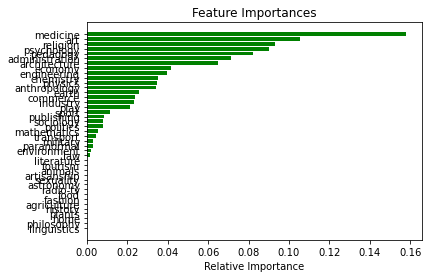

In [1778]:
importances = clf.feature_importances_
indices = np.argsort(importances)
features = [t[0] for t in Title_Domain_Embeddings[0]]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1768]:
def customised_embedding_level_1 (doc):

    temp_titles =[]
    sentence = Sentence(doc)

    stacked_embeddings.embed(sentence)
    tokens =  nltk.word_tokenize(doc)
    #    tokens =   Bigrams_cleaned_job_titles_wo_sw[i] 
    sentence_embedding = []
    for token in sentence:
        sentence_embedding.append(token.embedding)
    #     sentence_embedding = model.encode(tokens)
    for elem in tokens:
        synsets = wn.synsets(elem)
        query_word = elem
        quer_embedding = sentence_embedding[tokens.index(query_word)]
        if len(synsets)>1:
            definitions = []
            for syn in synsets:
                definitions.append(syn.definition())
            defintion_embeddings=[]    
            for defi in definitions:
                defsentence = Sentence(defi)
                document_embeddings.embed(defsentence)
    #                 temp = []
    #                 for token in defsentence:
    # #                     temp.append(token.embedding)
    #                 embeddings_tensor = torch.stack(temp)
                defintion_embeddings.append(defsentence.embedding)
    #             defintion_embeddings = model.encode(definitions)
            temp_sim=[]
            for def_emb in defintion_embeddings:
                temp_sim.append(util.pytorch_cos_sim(def_emb, quer_embedding))
            index = np.argmax(temp_sim)
            temp_titles.append((synsets[index],elem))
        elif len(synsets) == 1:
            temp_titles.append((synsets[0],elem))


    temp_indexing=[]
    for elem in temp_titles:
        definition = elem[0].definition().split(';')[0].strip()

    #         definition = wn.synset(elem).definition().split(';')[0].strip()
        match_found = False
        for temp in synsets_complete:
            if temp[2] == definition:
    #                 word = elem.split('.')[0]
                index = temp[0]
                string = index + '-' + elem[0].name().split('.')[1]
                temp_indexing.append(string)
                match_found = True
                break
        if not match_found:
            hypernym = elem[0].hypernyms()
            if len(hypernym)!=0:
                hypernym_def = hypernym[0].definition().split(';')[0].strip()
                for temp in synsets_complete:
                    if temp[2] == hypernym_def:
    #                         word = elem.split('.')[0]
                        index = temp[0]
                        string = index + '-' + elem[0].name().split('.')[1]
                        temp_indexing.append(string)
                        break


    Domain_Embedding = list(domain2synsets.keys())
    Domain_Embedding = Domain_Embedding[1:]
    model = SentenceTransformer('all-mpnet-base-v2')
    temp_domain_1 = []
    for elem in temp_indexing:

        if synset2domains[elem][0]!='factotum':
            temp_domain_1.append(synset2domains[elem][0])
        else:
            for tup in synsets_complete:
                if tup[0] == elem.split('-')[0]:
                    doc1 = model.encode(tup[2])
                    temp_sim = []
                    for j in range(len(Domain_Embeddings_Bert)):
                        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Bert[j], doc1))
                    index = np.argmax(temp_sim)
    #                     value = max(temp_sim)
                    temp_domain_1.append(Domain_Embedding[index] )


    Domain_Embedding = list(Basic_Domain_Mapping.keys())   

    temp_domain_2 = []
    for item in temp_domain_1:
        if item in Basic_Domain_Mapping.keys():
            temp_domain_2.append(item)
        elif item in [value for values in Basic_Domain_Mapping.values() for value in values]:
            for key, values in Basic_Domain_Mapping.items():
                if item in values:
                    temp_domain_2.append(key)
                    break

    counter = Counter(temp_domain_2)
    total = sum(counter.values())
    for item, count in counter.items():
        counter[item] /= total
    Title_Domain_Embeddings = sorted(counter.items())

    elem=[k[0] for k in Title_Domain_Embeddings]
    if Domain_Embedding not in elem:
        non_intersection = set(Domain_Embedding) - set(elem)
        for item in non_intersection:
            Title_Domain_Embeddings.append((item,0))

    Title_Domain_Embeddings.sort(key=lambda x: x[0], reverse=True) 

    Domain_Embeddings_Title =[t[1] for t in Title_Domain_Embeddings]
    Domain_Embeddings_Title = np.array(Domain_Embeddings_Title).reshape(1, -1)[0]

#     y_preds = clf.predict(Domain_Embeddings_Title)






            

    return (Domain_Embeddings_Title)

In [1760]:
from lime import lime_text
from sklearn.base import BaseEstimator, TransformerMixin
from lime.lime_text import LimeTextExplainer


In [1769]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(customised_embedding_level_1)

In [1770]:
p1 =make_pipeline(transformer,clf)

In [1771]:
idx=118
explainer = LimeTextExplainer(class_names=[t[0] for t in list(le_name_mapping.items())]) 
exp = explainer.explain_instance(cleaned_job_titles[idx], 
                                 p1.predict_proba, 
                                 num_features=10)
# print('Document id: %d' % idx)
# print('Probability(christian) = {:.3f}'.format(p1.predict_proba([newsgroups_test.data[idx]])[0,1]))
# print('True class: %s' % class_names[newsgroups_test.target[idx]])
# print('R2 score: {:.3f}'.format(exp.score))
exp.show_in_notebook(text=True)

KeyboardInterrupt: 

In [1741]:
# import eli5
# from eli5.lime import TextExplainer

# te = TextExplainer(random_state=2019)
# te.fit(cleaned_job_titles[118], customised_embedding_level_1)
# te.show_prediction(target_names=[t[0] for t in list(le_name_mapping.items())])

KeyboardInterrupt: 

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.75      0.75         8
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         1
           4       0.78      0.91      0.84        23

    accuracy                           0.79        38
   macro avg       0.51      0.48      0.49        38
weighted avg       0.73      0.79      0.76        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.5930388219544845
Matthew's corrcoef 0.6068720917050192
Log loss 1.6492069307383723


In [2005]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)

0.566304347826087

In [1617]:
print(metrics.classification_report(y_test, y_pred)) #level-3

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.38      0.50         8
           2       0.33      1.00      0.50         4
           3       0.00      0.00      0.00         1
           4       0.84      0.70      0.76        23

    accuracy                           0.63        38
   macro avg       0.45      0.51      0.43        38
weighted avg       0.72      0.63      0.64        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1618]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.42236699239956565
Matthew's corrcoef 0.4466192698981297
Log loss 0.906290211468181


In [1602]:
print(metrics.classification_report(y_test, y_pred)) #level-1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.62      0.67         8
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         1
           4       0.79      0.96      0.86        23

    accuracy                           0.76        38
   macro avg       0.43      0.42      0.42        38
weighted avg       0.70      0.76      0.72        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1603]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.5327868852459017
Matthew's corrcoef 0.551730909735711
Log loss 1.452677279132886


In [1663]:
print(metrics.classification_report(y_test, y_pred)) #level-2

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.75      0.80         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.85      1.00      0.92        23

    accuracy                           0.87        38
   macro avg       0.54      0.55      0.54        38
weighted avg       0.80      0.87      0.83        38



C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1460]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import log_loss
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa:", kappa)
print("Matthew's corrcoef",matthews_corrcoef(y_test, y_pred))
print('Log loss',log_loss(y_test, y_pred_probs))

Cohen's kappa: 0.7470039946737683
Matthew's corrcoef 0.7637779859768387
Log loss 0.39529589328879355


In [1680]:
Correct_Classes = []
Incorrect_Classes = []
for i in range(len(y_pred)):
    if y_pred[i]!=y_test[i]:
        Incorrect_Classes.append((y_test[i],y_pred[i],i))
    else:
        Correct_Classes.append((y_test[i],y_pred[i],i))

In [1114]:
le_name_mapping

{'Art, art science': 0,
 'Engineering': 1,
 'Human Medicine/Health Sciences': 2,
 'Humanities': 3,
 'Law, economic and social sciences': 4}

In [1681]:
Incorrect_Classes

[(1, 4, 2), (0, 1, 4), (3, 4, 27), (0, 4, 30), (1, 4, 31)]

In [1243]:
Incorrect_Classes

[(1, 4, 2),
 (0, 1, 4),
 (2, 4, 6),
 (2, 4, 12),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31)]

In [1409]:
Incorrect_Classes #Bigrams

[(1, 4, 2),
 (0, 1, 4),
 (2, 4, 6),
 (4, 1, 8),
 (2, 4, 12),
 (1, 4, 21),
 (3, 4, 27),
 (0, 4, 30),
 (1, 4, 31),
 (1, 4, 36)]

In [1682]:
indices_test[4]

118

In [1824]:
synsets_titles[118]

[(Synset('professorship.n.01'), 'Professorship'),
 (Synset('in.r.01'), 'in'),
 (Synset('subject.n.01'), 'subject'),
 (Synset('area.n.06'), 'area'),
 (Synset('game.n.09'), 'Game'),
 (Synset('design.v.05'), 'Design'),
 (Synset('focus.v.04'), 'focus'),
 (Synset('on.r.03'), 'on'),
 (Synset('game.n.09'), 'Game'),
 (Synset('art.n.01'), 'Art')]

In [1419]:
synset_indexing[8]

['00565801-n', '05758872-n', '07485368-n', '00667452-n']

In [1825]:
domains_title[118]

['pedagogy',
 'anatomy',
 'philosophy',
 'geometry',
 'play',
 'art',
 'psychoanalysis',
 'chemistry',
 'play',
 'art']

In [1826]:
domain_level_1_title[118]

['pedagogy',
 'medicine',
 'philosophy',
 'mathematics',
 'play',
 'art',
 'psychology',
 'chemistry',
 'play',
 'art']

In [1375]:
domain_level_1_title[133]

['pedagogy', 'administration', 'medicine', 'pedagogy', 'earth']

In [1168]:
wn.synset('information_science.n.01').definition()

'the sciences concerned with gathering, manipulating, storing, retrieving, and classifying recorded information'

In [977]:
domains_title[119]

['pedagogy', 'computer_science', 'medicine']

In [227]:
cleaned_job_titles[1]

'Professorship for IT Business and Digitalization'

In [225]:
wn.synsets('Digitalization')

[Synset('digitalization.n.01')]

In [586]:
wn.synset('history.n.02').definition()

'a record or narrative description of past events'

In [170]:
domains_title[3]

['pedagogy', 'computer_science', 'chemistry', 'pharmacy']

**Unsupervised**

In [1462]:
Mappings_Thematics = []
for i in range(len(tf_idf_features)):
    print(i, flush = True)
    doc1 = tf_idf_features[i]
    temp_sim = []
    for j in range(len(Ground_Truth_TF_IDF_Embeddings)):
        temp_sim.append(util.pytorch_cos_sim(Ground_Truth_TF_IDF_Embeddings[j], doc1))
    index = np.argmax(temp_sim)
    value = max(temp_sim)
    Mappings_Thematics.append((index,value))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1465]:
Mappings_Thematics_Areas = []
for elem in Mappings_Thematics:
    temp = elem[0]
    Mappings_Thematics_Areas.append((mapping[temp],elem[1]))

In [1466]:
Predicted_Thema = []
for elem in Mappings_Thematics_Areas:
    temp = elem[0].lower()
    temp = temp.strip()
    Predicted_Thema.append(temp)
print(accuracy_score(Actual_Thema, Predicted_Thema))

0.49333333333333335


In [1937]:
Mappings_Thematics = []
for i in range(len(bert_features_1)):
    print(i, flush = True)
    doc1 = bert_features_1[i]
    temp_sim = []
    for j in range(len(gt_bert_embeddings)):
        temp_sim.append(util.pytorch_cos_sim(gt_bert_embeddings[j], doc1))
    indices = sorted(range(len(temp_sim)), key=lambda k: temp_sim[k], reverse=True)[:2]
    values = [temp_sim[idx] for idx in indices]
    Mappings_Thematics.append([(idx, val) for idx, val in zip(indices, values)])
    
Mappings_Thematics_Areas = []
for i in range(len(Mappings_Thematics)):
    Mappings_Thematics_Areas.append([])
    for j in range(len(Mappings_Thematics[i])):
        temp = Mappings_Thematics[i][j][0]
        Mappings_Thematics_Areas[i].append((mapping[temp],Mappings_Thematics[i][j][1]))
        
Mappings_Thematics_Areas_lower=[]
for i in range(len(Mappings_Thematics_Areas)):
    Mappings_Thematics_Areas_lower.append([t[0].lower() for t in Mappings_Thematics_Areas[i]])
    
    
    
counter = []
for i in range(len(Mappings_Thematics_Areas_lower)):
    if Actual_Thema[i] in Mappings_Thematics_Areas_lower[i]:
        counter.append(1)
    else:
        counter.append(0)
        
        
np.mean(counter)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


0.74

In [1935]:
#bert-1
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [1811]:
len(gt_bert_embeddings)

6

In [1936]:
gt_bert_embeddings = model.encode(Clean_Ground_Truth)

In [1828]:
Mappings_Thematics = []
for i in range(len(bert_features_2)):
    print(i, flush = True)
    doc1 = bert_features_2[i]
    temp_sim = []
    for j in range(len(gt_bert_embeddings)):
        temp_sim.append(util.pytorch_cos_sim(gt_bert_embeddings[j], doc1))
    index = np.argmax(temp_sim)
    value = max(temp_sim)
    Mappings_Thematics.append((index,value))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1829]:
Mappings_Thematics_Areas = []
for elem in Mappings_Thematics:
    temp = elem[0]
    Mappings_Thematics_Areas.append((mapping[temp],elem[1]))

In [1830]:
Predicted_Thema = []
for elem in Mappings_Thematics_Areas:
    temp = elem[0].lower()
    temp = temp.strip()
    Predicted_Thema.append(temp)
print(accuracy_score(Actual_Thema, Predicted_Thema))

0.5533333333333333


In [1870]:
Mappings_Thematics = []
for i in range(len(Domain_Embeddings_Title)):
    print(i, flush = True)
    doc1 = Domain_Embeddings_Title[i]
    temp_sim = []
    for j in range(len(Domain_Embeddings_Title_gt)):
        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Title_gt[j], doc1))
    index = np.argmax(temp_sim)
    value = max(temp_sim)
    Mappings_Thematics.append((index,value))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84


C:\Users\shahania\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)


85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1926]:
Mappings_Thematics = []
for i in range(len(Domain_Embeddings_Title)):
    print(i, flush = True)
    doc1 = Domain_Embeddings_Title[i]
    temp_sim = []
    for j in range(len(Domain_Embeddings_Title_gt)):
        temp_sim.append(util.pytorch_cos_sim(Domain_Embeddings_Title_gt[j], doc1))
    indices = sorted(range(len(temp_sim)), key=lambda k: temp_sim[k], reverse=True)[:2]
    values = [temp_sim[idx] for idx in indices]
    Mappings_Thematics.append([(idx, val) for idx, val in zip(indices, values)])
    
Mappings_Thematics_Areas = []
for i in range(len(Mappings_Thematics)):
    Mappings_Thematics_Areas.append([])
    for j in range(len(Mappings_Thematics[i])):
        temp = Mappings_Thematics[i][j][0]
        Mappings_Thematics_Areas[i].append((mapping[temp],Mappings_Thematics[i][j][1]))
        
Mappings_Thematics_Areas_lower=[]
for i in range(len(Mappings_Thematics_Areas)):
    Mappings_Thematics_Areas_lower.append([t[0].lower() for t in Mappings_Thematics_Areas[i]])
    
    
    
counter = []
for i in range(len(Mappings_Thematics_Areas_lower)):
    if Actual_Thema[i] in Mappings_Thematics_Areas_lower[i]:
        counter.append(1)
    else:
        counter.append(0)
        
        
np.mean(counter)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [1927]:
Mappings_Thematics_Areas = []
for i in range(len(Mappings_Thematics)):
    Mappings_Thematics_Areas.append([])
    for j in range(len(Mappings_Thematics[i])):
        temp = Mappings_Thematics[i][j][0]
        Mappings_Thematics_Areas[i].append((mapping[temp],Mappings_Thematics[i][j][1]))

In [1928]:
Mappings_Thematics_Areas_lower=[]
for i in range(len(Mappings_Thematics_Areas)):
    Mappings_Thematics_Areas_lower.append([t[0].lower() for t in Mappings_Thematics_Areas[i]])

In [1929]:
counter = []
for i in range(len(Mappings_Thematics_Areas_lower)):
    if Actual_Thema[i] in Mappings_Thematics_Areas_lower[i]:
        counter.append(1)
    else:
        counter.append(0)
    

In [1930]:
np.mean(counter)

0.7733333333333333

In [1872]:
Predicted_Thema = []
for elem in Mappings_Thematics_Areas:
    temp = elem[0].lower()
    temp = temp.strip()
    Predicted_Thema.append(temp)
print(accuracy_score(Actual_Thema, Predicted_Thema))

0.6266666666666667


In [1526]:
Correct_Classes = []
Incorrect_Classes = []
for i in range(len(Predicted_Thema)):
    if Predicted_Thema[i]!=Actual_Thema[i]:
        Incorrect_Classes.append((Actual_Thema[i],Predicted_Thema[i],i))
    else:
        Correct_Classes.append((Actual_Thema[i],Predicted_Thema[i],i))

In [1529]:
unique_domain_gt[0]

['history',
 'administration',
 'humanities',
 'art',
 'anthropology',
 'linguistics',
 'ethnology',
 'philosophy']

In [1530]:
domains_title[5]

['school',
 'anatomy',
 'psychology',
 'quality',
 'medicine',
 'social_science',
 'psychology']

In [1513]:
mapping

{0: 'Humanities',
 1: 'Law, economic and social sciences',
 2: 'Mathematics, natural sciences',
 3: 'Human Medicine/Health Sciences',
 4: 'Engineering',
 5: 'Art, art science'}

In [1527]:
Incorrect_Classes

[('law, economic and social sciences', 'humanities', 0),
 ('engineering', 'human medicine/health sciences', 1),
 ('law, economic and social sciences', 'human medicine/health sciences', 5),
 ('engineering', 'law, economic and social sciences', 11),
 ('law, economic and social sciences', 'mathematics, natural sciences', 13),
 ('law, economic and social sciences', 'human medicine/health sciences', 14),
 ('humanities', 'law, economic and social sciences', 15),
 ('engineering', 'law, economic and social sciences', 16),
 ('law, economic and social sciences', 'human medicine/health sciences', 20),
 ('law, economic and social sciences', 'engineering', 34),
 ('law, economic and social sciences', 'humanities', 41),
 ('law, economic and social sciences', 'humanities', 42),
 ('law, economic and social sciences', 'humanities', 43),
 ('law, economic and social sciences', 'humanities', 44),
 ('law, economic and social sciences', 'humanities', 45),
 ('law, economic and social sciences', 'humanities', 

In [1509]:
Incorrect_Texts = []
for i in range(len(Incorrect_Classes)):
    Incorrect_Texts.append((data_jobs['Job_title_english'][Incorrect_Classes[i][2]],Incorrect_Classes[i][0],Incorrect_Classes[i][1]))

In [1510]:
from collections import Counter
Counter(elem[2] for elem in Incorrect_Texts)

Counter({'humanities': 22,
         'human medicine/health sciences': 10,
         'law, economic and social sciences': 10,
         'mathematics, natural sciences': 12,
         'engineering': 9,
         'art, art science': 8})